<a href="https://colab.research.google.com/github/srii5477/Traffic-Sign-Detection-using-CNN/blob/main/Traffic_Sign_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install streamlit
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np
import streamlit as st
import cv2
from zipfile import ZipFile
from tensorflow import keras
from tensorflow.keras.layers import Rescaling
from sklearn.model_selection import train_test_split
import matplotlib.image as mimg
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from tensorflow.keras.utils import image_dataset_from_directory
!pip install opendatasets
import opendatasets

In [3]:
opendatasets.download("https://www.kaggle.com/datasets/ahemateja19bec1025/traffic-sign-dataset-classification")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: sridevishankar
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/ahemateja19bec1025/traffic-sign-dataset-classification


100%|██████████| 190M/190M [00:02<00:00, 74.7MB/s]


In [4]:
# The dataset is split into a folder containing the images divided into subdirectories by class, and
# a csv file containing the labels for each subdirectory.
label_df = pd.read_csv('/content/traffic-sign-dataset-classification/labels.csv')

Displaying some random images from the traffic_Data image dataset to view the different traffic signs that the model will train on.

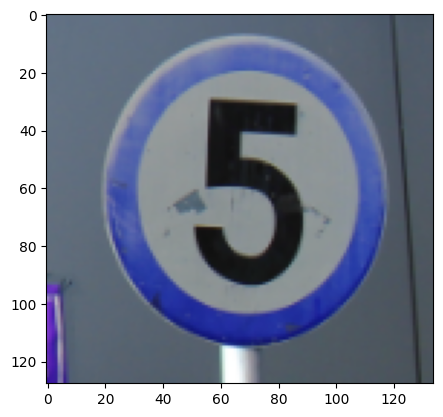

In [5]:
img = cv2.imread('/content/traffic-sign-dataset-classification/traffic_Data/DATA/0/000_0001.png')
plt.imshow(img)

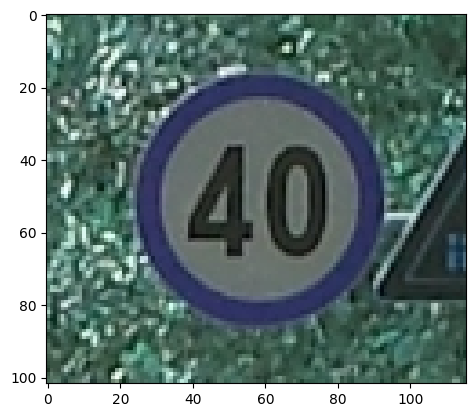

In [10]:
img = cv2.imread('/content/traffic-sign-dataset-classification/traffic_Data/DATA/3/003_0005.png')
plt.imshow(img)

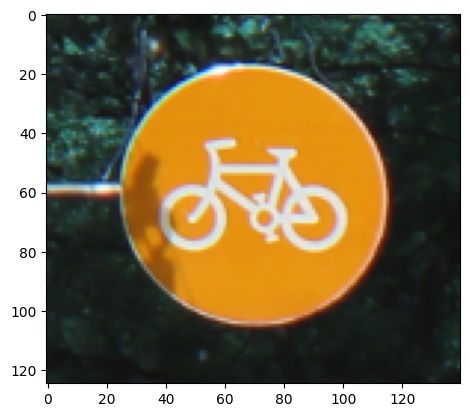

In [9]:
img = cv2.imread('/content/traffic-sign-dataset-classification/traffic_Data/DATA/30/030_0001.png')
plt.imshow(img)

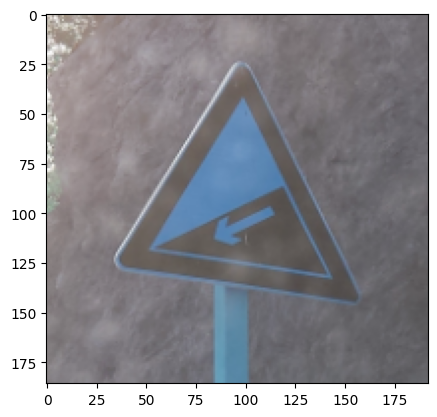

In [8]:
img = cv2.imread('/content/traffic-sign-dataset-classification/traffic_Data/DATA/40/040_0001.png')
plt.imshow(img)

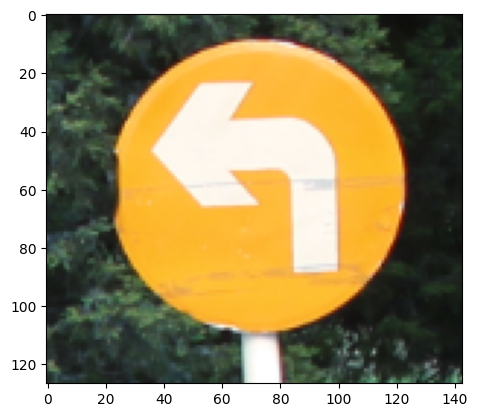

In [7]:
img = cv2.imread('/content/traffic-sign-dataset-classification/traffic_Data/DATA/22/022_0005.png')
plt.imshow(img)

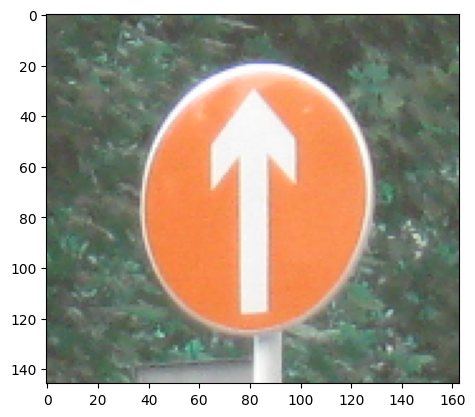

In [6]:
img = cv2.imread('/content/traffic-sign-dataset-classification/traffic_Data/DATA/21/021_0001.png')
plt.imshow(img)

In [11]:
label_df.head()

,ClassId,Name
0,0,Speed limit (5km/h)
1,1,Speed limit (15km/h)
2,2,Speed limit (30km/h)
3,3,Speed limit (40km/h)
4,4,Speed limit (50km/h)


In [12]:
path = '/content/traffic-sign-dataset-classification/traffic_Data/DATA'
# for Keras to work on our dataset, it needs to be converted into a tf.data.Dataset type
# the below code generates a tf.data.Dataset from image files in a directory.
train_df = tf.keras.preprocessing.image_dataset_from_directory(path, validation_split=0.2,
                                                               subset='training',
                                                               image_size=(
                                                                   200, 200),
                                                               seed=123,
                                                               batch_size=32)
test_df = tf.keras.preprocessing.image_dataset_from_directory(path, validation_split=0.2,
                                                             subset='validation',
                                                             image_size=(
                                                                 200, 200),
                                                             seed=123,
                                                             batch_size=32)


Found 4170 files belonging to 58 classes.
Using 3336 files for training.
Found 4170 files belonging to 58 classes.
Using 834 files for validation.


In [13]:
# Collecting a list of the class names
class_nums = train_df.class_names
class_names = []
for i in class_nums:
  class_names.append(label_df['Name'][int(i)])

In [14]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.models import Sequential

In [35]:
model = Sequential()
model.add(Conv2D(16, (3, 3), input_shape=(200, 200, 3), padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(len(label_df), activation='softmax'))
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_27 (Conv2D)                   │ (None, 200, 200, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_27 (MaxPooling2D)      │ (None, 100, 100, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_12 (Flatten)                 │ (None, 160000)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 58)                  │       9,280,058 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,280,506 (35.40 MB)

 Trainable params: 9,280,506 (35.40 MB)

 Non-trainable params: 0 (0.00 B)

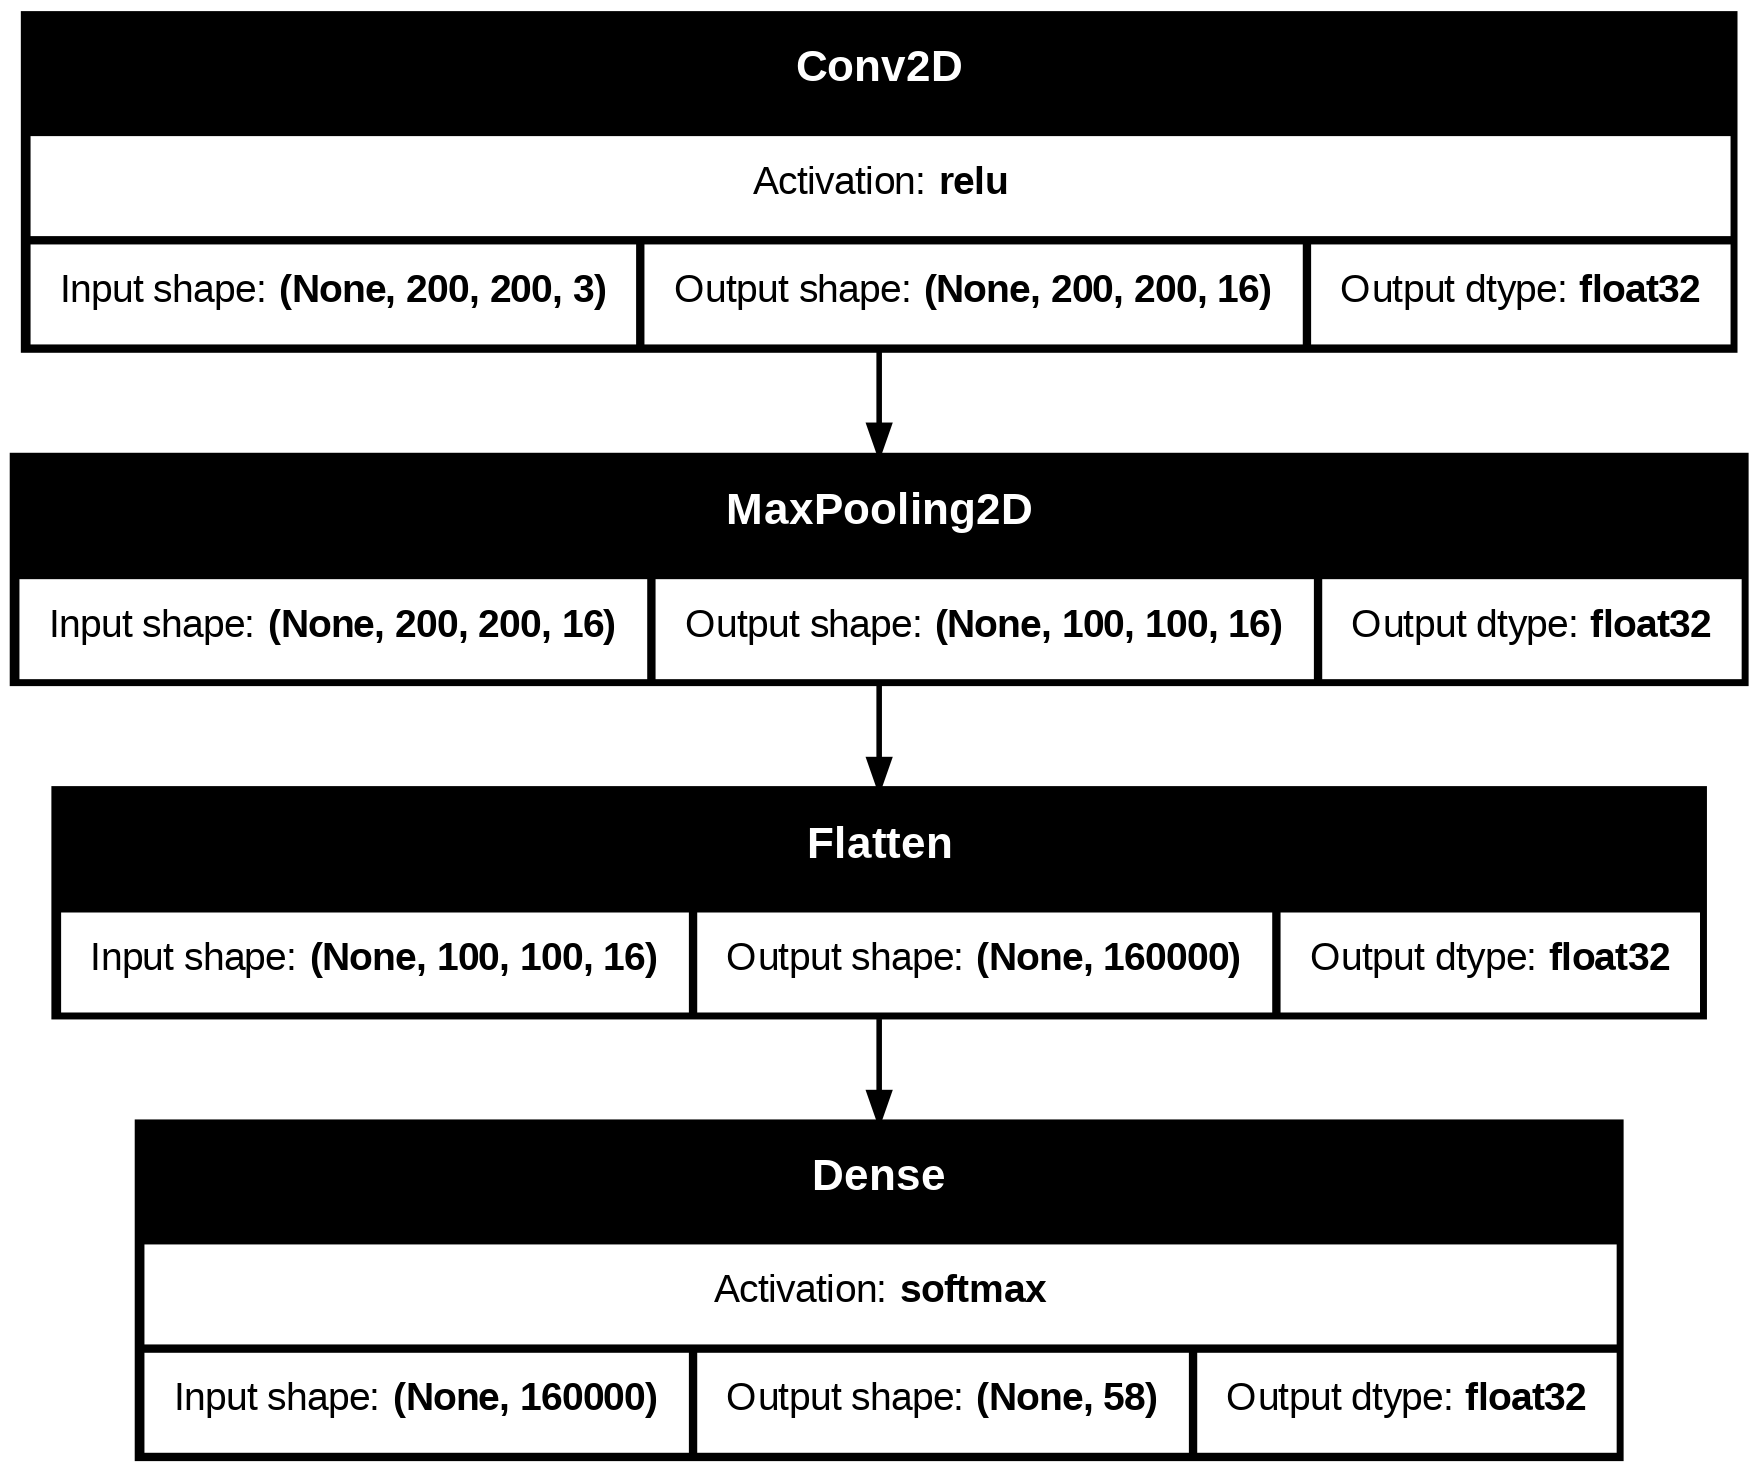

In [36]:
# Visualizing the layers for training our model.
keras.utils.plot_model(
	model,
	show_shapes=True,
	show_dtype=True,
	show_layer_activations=True
)


In [37]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer='adam', metrics=['accuracy'])

In [38]:
history = model.fit(train_df, validation_data=test_df, epochs=10)

Epoch 1/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 190s 2s/step - accuracy: 0.1843 - loss: 3355.7744 - val_accuracy: 0.7434 - val_loss: 10.7763
Epoch 2/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 115s 967ms/step - accuracy: 0.8062 - loss: 8.2309 - val_accuracy: 0.8933 - val_loss: 3.4009
Epoch 3/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 153s 1s/step - accuracy: 0.9527 - loss: 0.8473 - val_accuracy: 0.9305 - val_loss: 2.4369
Epoch 4/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 130s 960ms/step - accuracy: 0.9663 - loss: 0.4895 - val_accuracy: 0.9448 - val_loss: 1.9489
Epoch 5/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 140s 944ms/step - accuracy: 0.9902 - loss: 0.0889 - val_accuracy: 0.9388 - val_loss: 2.0331
Epoch 6/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 144s 961ms/step - accuracy: 0.9819 - loss: 0.2160 - val_accuracy: 0.9568 - val_loss: 1.8242
Epoch 7/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 151s 1s/step - accuracy: 0.9948 - loss: 0.0183 - val_accuracy: 0.9688 - val_loss: 1.6054
Epoch 8/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 129s 925ms/step - accuracy: 0.9991 - loss

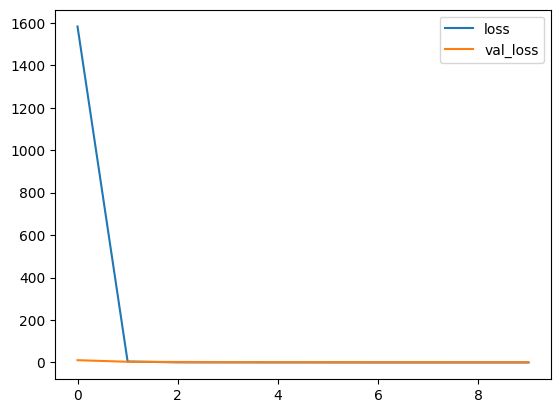

In [39]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'], loc='upper right')

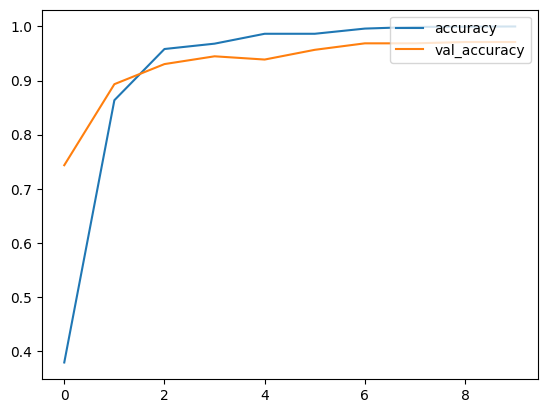

In [40]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'], loc='upper right')

In [42]:
from tensorflow.keras.models import save_model

save_model(model, 'traffic_sign_trained_model.keras')

In [44]:
from PIL import Image


@st.cache(allow_output_mutation=True)
def load_model():
	model = tf.keras.models.load_model('./traffic_sign_trained_model.keras')
	return model

def predict_class(image, model):
	image = tf.cast(image, tf.float32)
	image = tf.image.resize(image, [200, 200])
	image = np.expand_dims(image, axis = 0)
	prediction = model.predict(image)
	return prediction

model = load_model()
st.title('Traffic Sign Classifier')
file = st.file_uploader("Upload an image of a traffic sign.", type=["jpg", "png"])
if file is None:
	st.text('Waiting for upload....')
else:
	slot = st.empty()
	slot.text('Model prediction in progress....')
	test_image = Image.open(file)
	st.image(test_image, caption="Uploaded image", width = 400)
	pred = predict_class(np.asarray(test_image), model)
	class_names = ['Speed limit (5km/h)', 'Speed limit (15km/h)', 'Speed limit (30km/h)',
                'Speed limit (40km/h)', 'Speed limit (50km/h)', 'Speed limit (60km/h)',
                'Speed limit (70km/h)', 'speed limit (80km/h)', 'Dont Go straight or left',
                'Dont Go straight or Right', 'Dont Go straight', 'Dont Go Left',
                'Dont Go Left or Right', 'Dont Go Right', 'Dont overtake from Left',
                'No Uturn', 'No Car', 'No horn', 'Speed limit (40km/h)'
                'Speed limit (50km/h)', 'Go straight or right', 'Go straight',
                'Go Left', 'Go Left or right', 'Go Right', 'keep Left', 'keep Right',
                'Roundabout mandatory', 'watch out for cars', 'Horn',
                'Bicycles crossing', 'Uturn', 'Road Divider', 'Traffic signals',
                'Danger Ahead', 'Zebra Crossing', 'Bicycles crossing',
                'Children crossing', 'Dangerous curve to the left',
                'Dangerous curve to the right', 'Unknown1', 'Unknown2',
                'Unknown3', 'Go right or straight', 'Go left or straight',
                'Unknown4', 'ZigZag Curve', 'Train Crossing', 'Under Construction',
                'Unknown5', 'Fences', 'Heavy Vehicle Accidents', 'Unknown6',
                'Give Way', 'No stopping', 'No entry', 'Unknown7', 'Unknown8']
	result = class_names[np.argmax(pred)]
	output = 'The image is a ' + result
	slot.text('Done')
	st.success(output)

2024-10-31 17:56:29.737 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-31 17:56:30.107 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2024-10-31 17:56:30.124 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-31 17:56:30.135 
`st.cache` is deprecated and will be removed soon. Please use one of Streamlit's new
caching commands, `st.cache_data` or `st.cache_resource`. More information
[in our docs](https://docs.streamlit.io/develop/concepts/architecture/caching).

**Note**: The behavior of `st.cache` was updated in Streamlit 1.36 to the new caching
logic used by `st.cache_data` and `st.cache_resource`. This might lead to some problems
or unexpected behavior in certain edge cases.

2024-10-31 17:56:30.150 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
202